##  ФИО студента: Голубинов Владислав
##  Группа:       18-ИВТ-3
##  Вариант:      1
##  Задание:      mushrooms
1. Изучить набор данных. Создать описание набора данных на русском языке. 
Описать признаки, используемые в наборе данных (включить полученные описания 
в отчёт).
2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и 
после данной операции;
3. Оцените сбалансированность данных по классам (постройте гистограмму). 
Используйте полученную информацию при выборе метрики оценки качества классификации
(PR или ROC кривая)
4. Выполните масштабирование количественных признаков; Постройте диаграммы 
BoxPlot для признаков до и после масштабирования. Выберите способ 
масштабирования (например, нормализацию или стандартизацию);
5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют 
с наибольшим числом других (удалять признаки нужно только для линейных методов 
классификации);
7. Заполните пропущенные значения в данных;
8. Решите поставленную задачу классификации в соответствии с заданием. 
При подборе параметров классификатора используйте метод GridSearchCV и 
перекрёстную проверку (изучите возможные для изменения параметры классификации). 
Определите схему построения многоклассового классификатора, используемую по 
умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). 
Постройте, если это возможно, многоклассовую классификацию на основе схем
«один-против-всех» и «все-против-всех». Оцените точность классификации для 
каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть 
построены отдельные кривые, а также кривые для микро и макроусреднения метрик 
качества). Для линейного классификатора используйте регуляризацию. 
9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

## 1 пункт

1. *cap-shap* - **Форма шляпки**
2. *cap-surface* - **Поверхность шляпки**
3. *cap-color* - **Цвет шляпки**
4. *bruises* - **Пятна**
5. *odor* - **Запах**
6. *gill-attachment* - **Форма жабер**
7. *gill-spacing* - **Расстояние между жабрами**
8. *gill-size* - **Размер жабер**
9. *gill-color* - **Цвет жабер**
10. *stalk-shape* - **Форма ножки**
11. *stalk-root* - **Корень**
12. *stalk-surface-above-ring* - **Форма ножки выше юбки**
13. *stalk-surface-below-ring* - **Форма ножки ниже юбки**
14. *stalk-color-above-ring* - **Цвет ножки выше юбки**
15. *stalk-color-below-ring* - **Цвет ножки ниже юбки**
16. *veil-type* - **Форма юбки**
17. *veil-color* - **Цвет юбки**
18. *ring-number* - **Количество колец**
19. *ring-type* - **Тип кольца**
20. *spore-print-color* - **Цвет спор**
21. *population* - **Популяция**
22. *habitat* - **Среда обитания**

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline
warnings.simplefilter('ignore')

In [2]:
label_encoder = LabelEncoder()
scaler = StandardScaler()

In [3]:
train_data = pd.read_csv("mushrooms.csv")
train_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
train_data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

т.к veil-type неизменяется удалим его

In [5]:
train_data = train_data.drop(columns='veil-type')
train_data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

## Пункт 2

In [6]:
print("До удаление дубликатов: %d" % len(train_data))
train_data.drop_duplicates(keep="first", inplace=True)
print("После удаление дубликатов: %d" % len(train_data))

До удаление дубликатов: 8124
После удаление дубликатов: 8124


## Пункт 3

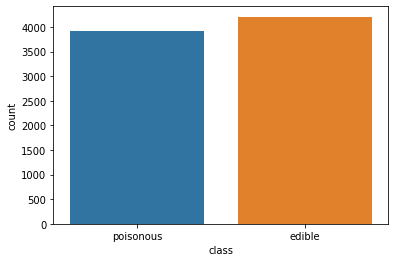

In [7]:
sns.barplot(data=pd.DataFrame({
    'count': [
        len(train_data.loc[train_data["class"] == 'p']),
        len(train_data.loc[train_data["class"] == 'e']),
    ],
    'class': [
        'poisonous',
        'edible',
    ],
}), y='count', x='class') 

Вывод: классы сбалансированны

## Пункт 4
Т.к. в данном наборе данных нет количественных признаков, масштабирование не требуется.

## Пункт 5

In [8]:
for column in list(train_data):
    train_data[column] = pd.Series(label_encoder.fit_transform(train_data[column]))
train_data.head() 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


## Пункт 6

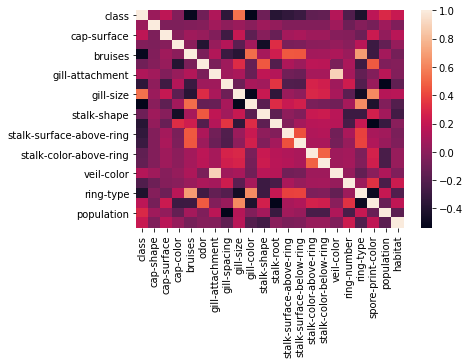

In [9]:
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix)

## Пункт 7

In [10]:
train_data.count()

class                       8124
cap-shape                   8124
cap-surface                 8124
cap-color                   8124
bruises                     8124
odor                        8124
gill-attachment             8124
gill-spacing                8124
gill-size                   8124
gill-color                  8124
stalk-shape                 8124
stalk-root                  8124
stalk-surface-above-ring    8124
stalk-surface-below-ring    8124
stalk-color-above-ring      8124
stalk-color-below-ring      8124
veil-color                  8124
ring-number                 8124
ring-type                   8124
spore-print-color           8124
population                  8124
habitat                     8124
dtype: int64

Пропусков нет

## Пункт 8

In [11]:
data_X, data_Y = train_data.drop(columns="class", axis=1).values, train_data["class"].values

train_x, test_x, train_y, test_y = train_test_split(data_X, data_Y, test_size=0.3)

### классификатор K ближайших соседей (задаётся количество ближайших объектов)

In [12]:
knn = KNeighborsClassifier()

search = GridSearchCV(knn, {'n_neighbors': [x for x in range(1, 50)]})
search.fit(train_x, train_y)

n = search.best_estimator_.n_neighbors
best = search.best_score_
print('best:', best, ', neighbors num:', n, sep=' ')

knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
print('Accuracy knn: %.5f' % accuracy_score(test_y, knn_predict))

best: 0.9998242530755711 , neighbors num: 1
Accuracy knn: 1.00000


### линейный классификатор (персептрон)

In [13]:
ppn = Perceptron()

search = GridSearchCV(estimator=ppn, param_grid={
    'alpha': np.linspace(0, 1, 20)[1:],
    'max_iter': [x for x in range(1, 50)],
}, n_jobs=-1)
search.fit(train_x, train_y)
alpha = search.best_estimator_.alpha
max_iter = search.best_estimator_.max_iter
best = search.best_score_
print('best:', best, 'alpha:', alpha, 'max_iter:', max_iter)

ppn = Perceptron(alpha=alpha, max_iter=max_iter)
ppn.fit(train_x, train_y)
ppn_predict = ppn.predict(test_x)
print('Accuracy ppn: %.5f' % accuracy_score(test_y, ppn_predict))

best: 0.9451300171728085 alpha: 0.05263157894736842 max_iter: 12
Accuracy ppn: 0.80476


## Пункт 9

In [14]:
test_y_inversion = [1-y for y in test_y]

prob_knn = knn.predict_proba(test_x)

cppn = CalibratedClassifierCV(ppn, cv=10)
cppn.fit(train_x, train_y)
prob_ppn = cppn.predict_proba(test_x)

### PR график

In [15]:
def addPlotPr(prob, occupancy, label, test):
    precision, recall, _ = precision_recall_curve(test, prob[:, occupancy])
    aps = average_precision_score(test, prob[:, occupancy])
    plt.plot(recall, precision, label='%s PR (area = %f)' % (label, aps))
    

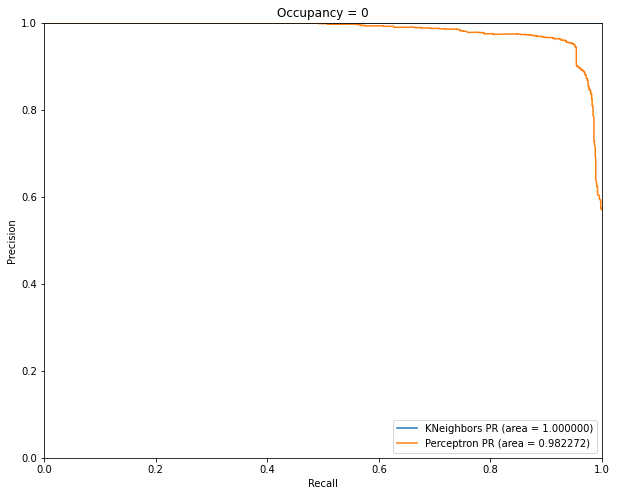

In [16]:
plt.figure(figsize=(10,8))

addPlotPr(prob_knn, 0, 'KNeighbors', test_y_inversion)
addPlotPr(prob_ppn, 0, 'Perceptron', test_y_inversion)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Occupancy = 0')
plt.legend(loc=4, fontsize='medium')
plt.show()

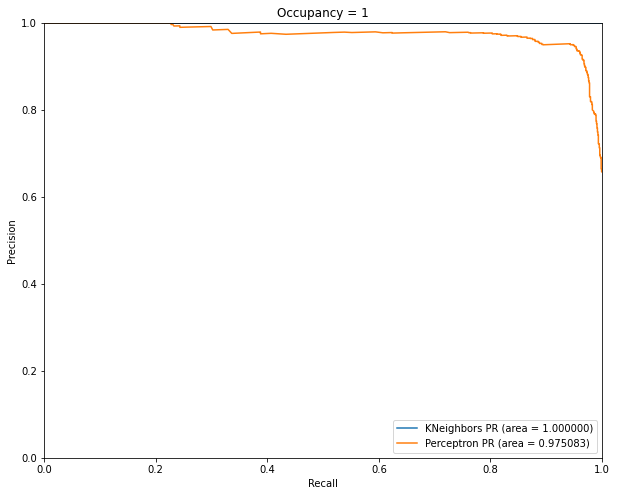

In [17]:
plt.figure(figsize=(10,8))

addPlotPr(prob_knn, 1, 'KNeighbors', test_y)
addPlotPr(prob_ppn, 1, 'Perceptron', test_y)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Occupancy = 1')
plt.legend(loc=4, fontsize='medium')
plt.show()

### ROC графики

In [18]:
def addPlotRoc0(prob, label, test):
    tpr, fpr, _ = roc_curve(test, prob[:, 0])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc)) 

def addPlotRoc1(prob, label, test):
    fpr, tpr, _ = roc_curve(test, prob[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc)) 

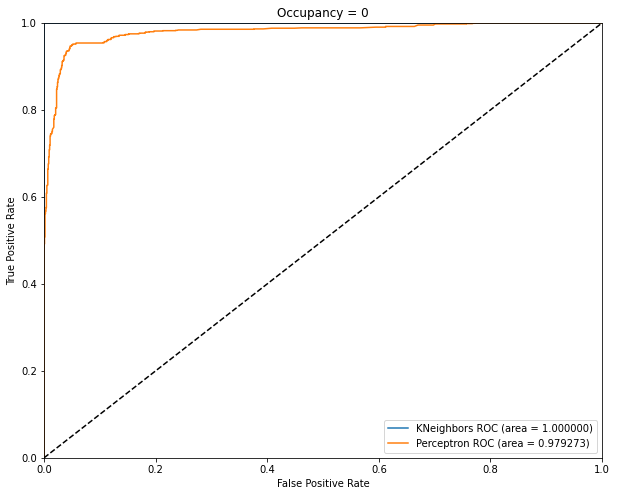

In [19]:
plt.figure(figsize=(10,8))

addPlotRoc0(prob_knn, 'KNeighbors', test_y)
addPlotRoc0(prob_ppn, 'Perceptron', test_y)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 0')
plt.show()

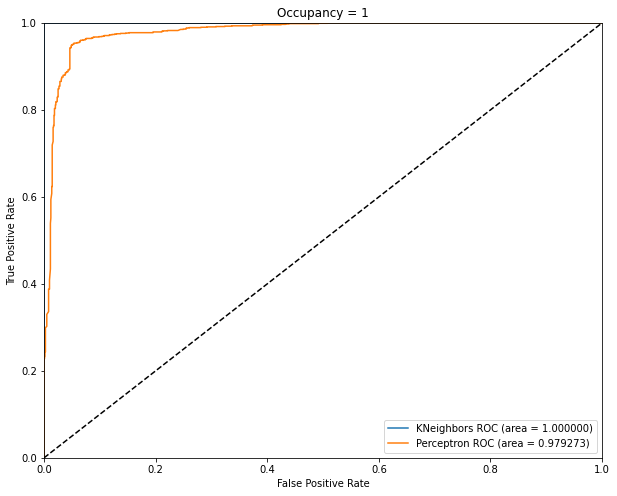

In [20]:
plt.figure(figsize=(10,8))

addPlotRoc1(prob_knn, 'KNeighbors', test_y)
addPlotRoc1(prob_ppn, 'Perceptron', test_y)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 1')
plt.show()
